In [104]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn import datasets
sns.set(style="white", color_codes=True)

df = datasets.load_iris()
iris = pd.DataFrame(df.data, columns = df.feature_names)
iris['Target'] = df.target
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

In [106]:
iris["Target"].value_counts()

Target
0    50
1    50
2    50
Name: count, dtype: int64

In [108]:
## Analisis de conteo de nulls
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

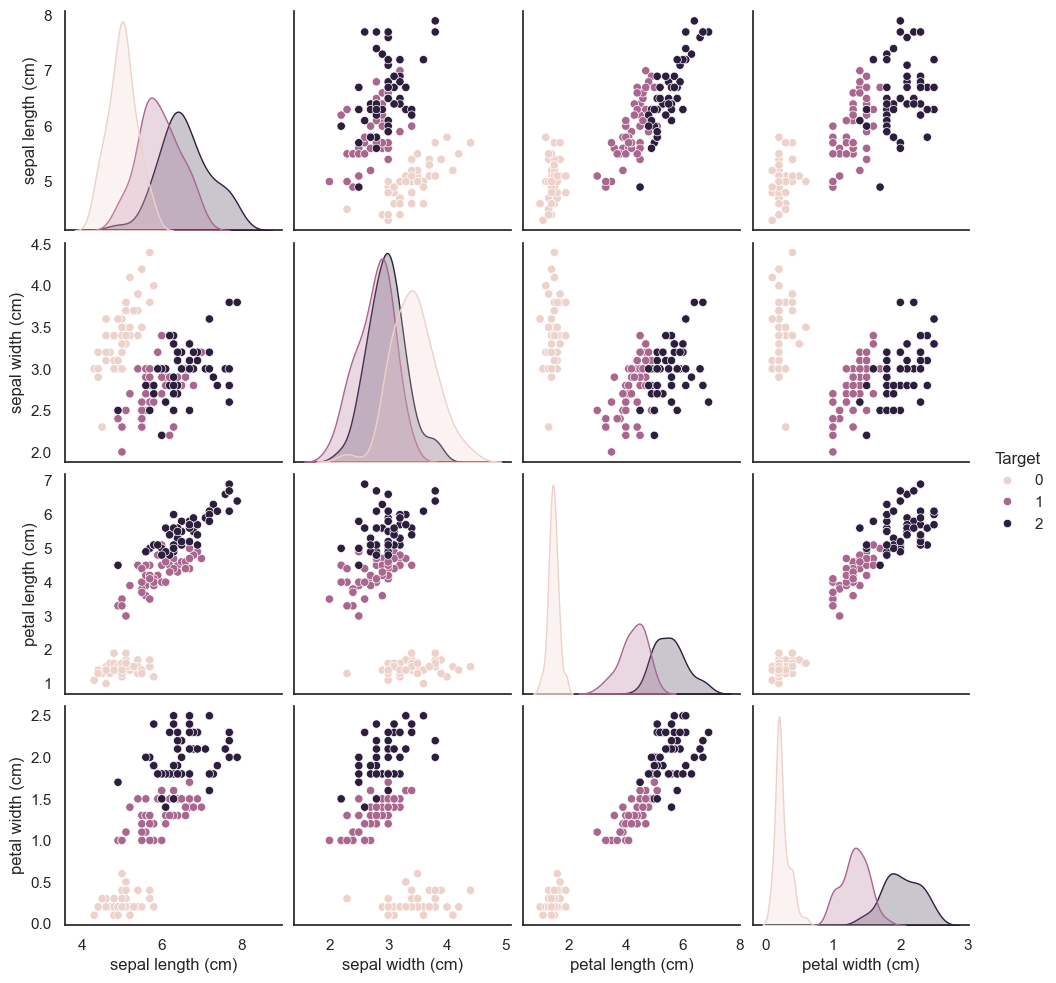

In [109]:
## Se grafican todos los pares posibles
p=sns.pairplot(iris, hue = 'Target')

In [110]:
## Escalar los datos con media cero y desviación estándar uno para que todas las variables contribuyan al análisis
from sklearn.preprocessing import StandardScaler
X = iris.drop('Target', axis = 1)
Y = iris.Target
scaled_features = StandardScaler().fit_transform(X)

In [111]:
## Se aplica PCA con dos componentes principales y se muestra la varianza explicada por las componentes, indicando qué porcentaje de la varianza total
## de los datos originales se conserva en los componentes principales.
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
features_pca = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(features_pca, columns = ['PC1', 'PC2'])
pca_df['Target'] = Y
print(pca_df.head())
variance = pca.explained_variance_ratio_
print(f"Varianza explicada por las dos primeras componentes: {variance.sum() * 100:.2f}%")

        PC1       PC2  Target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0
3 -2.299384 -0.597395       0
4 -2.389842  0.646835       0
Varianza explicada por las dos primeras componentes: 95.81%


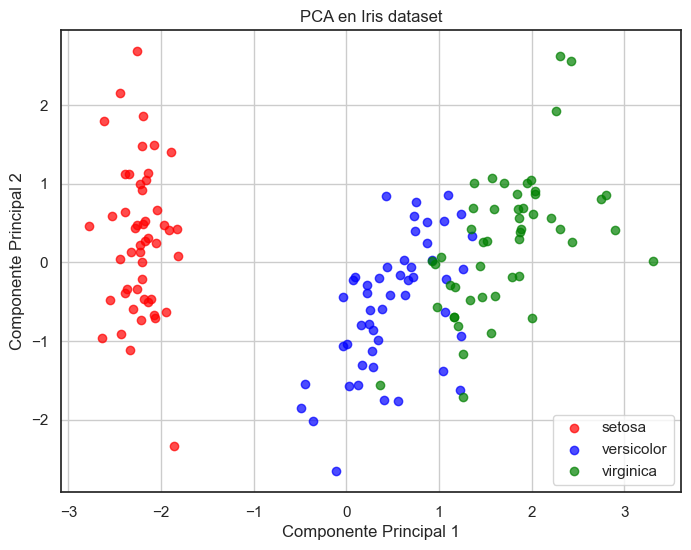

In [112]:
## Se grafican los componentes principales y se ven graficamente las varianzas de los datos, en este caso, no se pierde casi informacion de los
## datos al reducir las dimensiones y se pueden resumir en esa unica dimensión.
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))

colors = ['red', 'blue', 'green']
labels = ['setosa', 'versicolor', 'virginica']

for i in range(3):
    plt.scatter(pca_df.loc[pca_df['Target'] == i, 'PC1'], pca_df.loc[pca_df['Target'] == i, 'PC2'], label = labels[i], color = colors[i], alpha = 0.7)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA en Iris dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Se puede observar la diferencia de clases entre los tres tipos de iris. La setosa tiene claramente caracteristicas distintas a las otras
## Las caracteristicas de versicolor y virginica son un poco similares por lo que se solapan más. Pero al ver que se pueden distinguir las clases
## de todas maneras, se puede ver que las caracteristicas son explicadas de manera adecuada.